   Size   Price
0   850  150000
1   900  180000
2  1200  200000
3  1500  250000
4  1700  280000


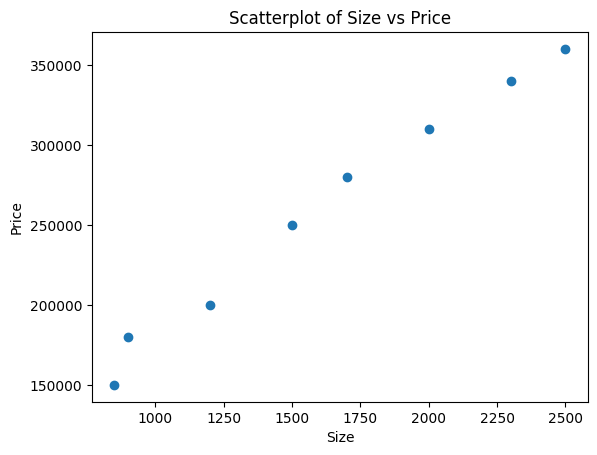

Intercept: [59128.61624259]
Coefficient: [[123.31822935]]
R-Squared: 0.9859141957681887


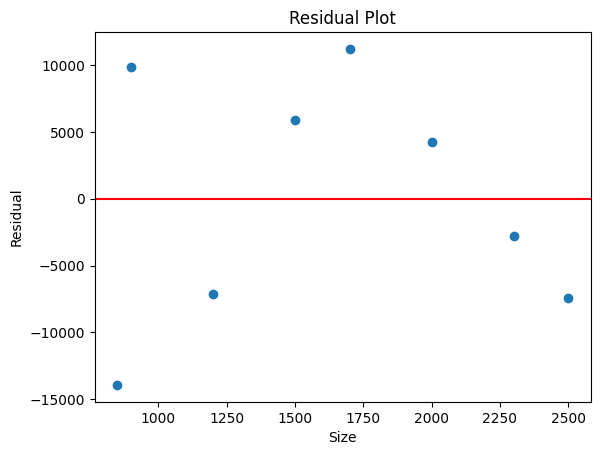

Mean Percent Error: Price    3.569518
dtype: float64
Predictions: [[490742.41896131]
 [552401.53363541]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


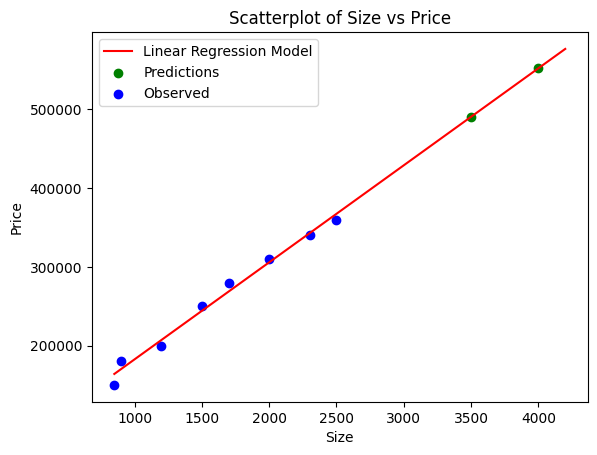

In [24]:
# importing libraries. sklearn.linear_model gives linear regression code
# pandas = data manipulation (used here for data frame). numpy is the same
# matplotlib.pyplot = plotting / visualization
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# creating the data frame
data = {
    'Size': [850, 900, 1200, 1500, 1700, 2000, 2300, 2500],
    'Price': [150000, 180000, 200000, 250000, 280000, 310000, 340000, 360000]
}
data_frame = pd.DataFrame(data)
# .head() gives the top 5 values from whatever is printed. Reduces clutter
print(data_frame.head())

# x is size, y is price. Pulling out these values from the dataframe
x = data_frame[['Size']]
y = data_frame[['Price']]

# plotting to see relationship
plt.scatter(x,y)
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Scatterplot of Size vs Price')
plt.show()

# creating linear regression model
linregmodel = LinearRegression()
linregmodel.fit(x,y)

# taking out model parameters
print("Intercept:", linregmodel.intercept_)
print("Coefficient:", linregmodel.coef_)
print("R-Squared:", linregmodel.score(x,y))

# testing model validity
y_values = linregmodel.predict(x)
# residual
residual = y - y_values
plt.scatter(x, residual)
plt.axhline(y=0, color = "red")
plt.xlabel('Size')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()
# mean percent error (MPE)
percent_error = (abs(residual)/y_values)*100
MPE = percent_error.mean()
print("Mean Percent Error:", MPE)

# preidicting other prices
Prediction_x = pd.DataFrame([[3500], [4000]], columns = ["Size"])
Prediction_y = linregmodel.predict(Prediction_x)
print("Predictions:", Prediction_y)

# final graph / data visualization
# this line below creates the graph by creating dataframe to plot
graph = np.array(range(850, 4200)).reshape(-1,1)
y_values_graph = linregmodel.predict(graph)
plt.plot(graph, y_values_graph, color = "red",
         label = "Linear Regression Model")
plt.scatter(Prediction_x, Prediction_y, color = "green", label = "Predictions")
plt.scatter(x,y, color = "blue", label = "Observed")
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Scatterplot of Size vs Price')
plt.legend()
plt.show()